In [1]:
import pandas as pd
import numpy as np

import plotly as py
import plotly.graph_objs as go
py.offline.init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
%matplotlib inline

from collections import Counter

# Taxonomic Enrichment in Clusters

## read in files

In [2]:
labels = pd.read_csv("../clustering_env_predictiveness/clusterlabelsk5.csv")
annotations = pd.read_csv("../annotation_SAR86.tab", sep="\t")
labeled_annotations = labels.merge(annotations, left_on="gene",right_on="orf_id")
genes = pd.read_csv("../satellite_models/get_gene_data/GeneCoverageMatrix_Normalized037_Binary.csv")

In [3]:
print(len(labels), len(labeled_annotations))

24317 24291


In [4]:
#pull genes from known genomes out 
figs = [x for x in labeled_annotations['gene'] if 'fig' in x]
genomes = [x.split('.peg')[0] for x in figs]
genomeset = list(set(genomes))

genome_map = {'fig|1208365.4':'SAR86E',
              'fig|1123867.3':'SAR86B',
              'fig|1123866.3':'SAR86A',
              'fig|1123865.4':'SAR86D',
              'fig|1123864.3':'SAR86C'
             }
Counter(genomes)

Counter({'fig|1123864.3': 1,
         'fig|1123865.4': 6,
         'fig|1123866.3': 619,
         'fig|1123867.3': 7,
         'fig|1208365.4': 151})

In [5]:
len(figs)

784

## genome enrichment in clusters

In [192]:
clusters = list(set(labeled_annotations['cluster']))

genestrains = pd.DataFrame({"cluster":clusters})
for genome in genomeset:
    print("---",genome)
    col = []
    #subset genes corresponding to cluster
    for clust in clusters:
        subset = labels[labels['cluster']==clust]
        
        genes_in_genome = [x for x in subset['gene'] if genome in x]
        #percent genes in that cluster from that genome
        print("cluster",clust,len(genes_in_genome), len(subset))
        col.append(len(genes_in_genome)/len(subset) * 100)
    genestrains[genome] = col

--- fig|1123865.4
cluster 1 0 4435
cluster 2 1 2630
cluster 3 0 3395
cluster 4 0 7583
cluster 5 6 6274
--- fig|1123867.3
cluster 1 1 4435
cluster 2 6 2630
cluster 3 0 3395
cluster 4 5 7583
cluster 5 7 6274
--- fig|1123866.3
cluster 1 0 4435
cluster 2 4 2630
cluster 3 118 3395
cluster 4 493 7583
cluster 5 7 6274
--- fig|1123864.3
cluster 1 0 4435
cluster 2 2 2630
cluster 3 0 3395
cluster 4 1 7583
cluster 5 2 6274
--- fig|1208365.4
cluster 1 76 4435
cluster 2 2 2630
cluster 3 0 3395
cluster 4 1 7583
cluster 5 78 6274


In [193]:
clusters = list(set(labeled_annotations['cluster']))

genomestrains = pd.DataFrame({"cluster":clusters})
for genome in genomeset:
    print("---",genome)
    total_genes_in_genome = [x for x in labels['gene'] if genome in x]
    print(len(total_genes_in_genome),"genes in genome")
    col = []
    #subset genes corresponding to cluster
    for clust in clusters:
        subset = labels[labels['cluster']==clust]
        
        genes_in_genome = [x for x in subset['gene'] if genome in x]
        #percent genes in that genome in that cluster
        print("cluster",clust,len(genes_in_genome))
        col.append(len(genes_in_genome)/len(total_genes_in_genome) * 100)
    genomestrains[genome] = col

--- fig|1123865.4
7 genes in genome
cluster 1 0
cluster 2 1
cluster 3 0
cluster 4 0
cluster 5 6
--- fig|1123867.3
19 genes in genome
cluster 1 1
cluster 2 6
cluster 3 0
cluster 4 5
cluster 5 7
--- fig|1123866.3
622 genes in genome
cluster 1 0
cluster 2 4
cluster 3 118
cluster 4 493
cluster 5 7
--- fig|1123864.3
5 genes in genome
cluster 1 0
cluster 2 2
cluster 3 0
cluster 4 1
cluster 5 2
--- fig|1208365.4
157 genes in genome
cluster 1 76
cluster 2 2
cluster 3 0
cluster 4 1
cluster 5 78


In [194]:
clusters = list(set(labeled_annotations['cluster']))

genomeenrich = pd.DataFrame({"cluster":clusters})
for genome in genomeset:
    print("---",genome)
    total_genes_in_genome = [x for x in labels['gene'] if genome in x]
    expected_genome_in_cluster = len(total_genes_in_genome)/6.0
    print(len(total_genes_in_genome),"genes in genome")
    col = []
    #subset genes corresponding to cluster
    for clust in clusters:
        subset = labels[labels['cluster']==clust]
        
        genes_in_genome = [x for x in subset['gene'] if genome in x]
        #percent genes in that genome in that cluster
        col.append((len(genes_in_genome) - expected_genome_in_cluster)/expected_genome_in_cluster)
    genomeenrich[genome] = col

--- fig|1123865.4
7 genes in genome
--- fig|1123867.3
19 genes in genome
--- fig|1123866.3
622 genes in genome
--- fig|1123864.3
5 genes in genome
--- fig|1208365.4
157 genes in genome


In [195]:
genomeenrich

,cluster,fig|1123865.4,fig|1123867.3,fig|1123866.3,fig|1123864.3,fig|1208365.4
0,1,-1.000000,-0.684211,-1.000000,-1.0,1.904459
1,2,-0.142857,0.894737,-0.961415,1.4,-0.923567
2,3,-1.000000,-1.000000,0.138264,-1.0,-1.000000
3,4,-1.000000,0.578947,3.755627,0.2,-0.961783
4,5,4.142857,1.210526,-0.932476,1.4,1.980892


In [196]:
genomestrains[['fig|1208365.4', 'fig|1123866.3']]

,fig|1208365.4,fig|1123866.3
0,48.407643,0.000000
1,1.273885,0.643087
2,0.000000,18.971061
3,0.636943,79.260450
4,49.681529,1.125402


In [197]:
genestrains

,cluster,fig|1123865.4,fig|1123867.3,fig|1123866.3,fig|1123864.3,fig|1208365.4
0,1,0.000000,0.022548,0.000000,0.000000,1.713641
1,2,0.038023,0.228137,0.152091,0.076046,0.076046
2,3,0.000000,0.000000,3.475700,0.000000,0.000000
3,4,0.000000,0.065937,6.501385,0.013187,0.013187
4,5,0.095633,0.111572,0.111572,0.031878,1.243226


In [198]:
trace = go.Heatmap(z=[row[1:] for ix,row in genestrains.iterrows()],
                   x=[genome_map[c] for c in genestrains.columns[1:]],
                   y=genestrains['cluster'],
                   colorscale=[[0.0, 'rgb(255,255,255)'], [1.0, 'rgb(255,0,40)']],
                   zmin=0.2,
                   zmax=6
                  )
data=[trace]
py.offline.iplot(data, filename='cluster-heatmap')

In [199]:
trace = go.Heatmap(z=[row for ix,row in genomestrains[['fig|1208365.4', 'fig|1123866.3']].iterrows()],
                   x=[genome_map[c] for c in genomestrains[['fig|1208365.4', 'fig|1123866.3']].columns],
                   y=genomestrains[['fig|1208365.4', 'fig|1123866.3']].index+1,
                   colorscale=[[0.0, 'rgb(255,255,255)'], [1.0, 'rgb(255,0,40)']],
                   zmin=1,
                   zmax=100
                  )
data=[trace]
py.offline.iplot(data, filename='cluster-heatmap')

In [200]:
trace = go.Heatmap(z=[row[1:] for ix,row in genomeenrich.iterrows()],
                   x=[genome_map[c] for c in genomeenrich.columns[1:]],
                   y=genomeenrich['cluster'],
                   colorscale=[[-1.0, 'rgb(40,0,255)'], [1.0, 'rgb(255,0,40)']],
                   zmin=-1,
                   zmax=1
                  )
data=[trace]
py.offline.iplot(data, filename='cluster-heatmap')

## contig enrichment in clusters

In [7]:
scf = [x for x in labeled_annotations['gene'] if 'scf' in x]
contigs = [s.split('_')[0] for s in scf]
print(len(set(contigs)),"contigs")

732 contigs


In [213]:
contigset = [x for x, count in Counter(contigs).most_common()]

contigstrains = pd.DataFrame({"cluster":clusters})
for contig in contigset:
    col = []
    #subset genes corresponding to cluster
    for clust in clusters:
        subset = labels[labels['cluster']==clust]
        
        genes_in_genome = [x for x in subset['gene'] if contig in x]
        #percent genes in that cluster from that contig
        col.append(len(genes_in_genome)/len(subset) * 100)
    contigstrains[contig] = col

In [284]:
contigset = [x for x, count in Counter(contigs).most_common()]

contigperc = pd.DataFrame({"cluster":clusters})
for contig in contigset:
    col = []
    total_genes_on_contig = [x for x in labels['gene'] if contig in x]
    #subset genes corresponding to cluster
    for clust in clusters:
        subset = labels[labels['cluster']==clust]
        
        genes_in_genome = [x for x in subset['gene'] if contig in x]
        #percent genes in that cluster from that contig
        col.append(len(genes_in_genome)/len(total_genes_on_contig) * 100)
    contigperc[contig] = col

In [9]:
clusters = [1,2,3,4,5]

In [67]:
contigset = [x for x, count in Counter(contigs).most_common()]

contigenrich = pd.DataFrame({"cluster":clusters})
contig_counts = pd.DataFrame()
contig_expected = pd.DataFrame()

for contig in contigset:
    col = []
    counts = []
    expected = []
    
    total_genes_on_contig = [x for x in labels['gene'] if contig in x]
    
    overall = len(total_genes_on_contig)/len(labels)
    
    #subset genes corresponding to cluster
    for clust in clusters:
        subset = labels[labels['cluster']==clust]
        
        #expected genes from contig in cluster is proportional to total num genes in cluster (b/c total num genes in clusters aren't exactly even)
        expected_genes_per_cluster = (len(subset)/len(labels)) * len(total_genes_on_contig) #e.g. even split contig genes across clusters
        
        genes_in_genome = [x for x in subset['gene'] if contig in x]
        #enrichment of genes in that cluster from that contig relative to expected value
        col.append((len(genes_in_genome) - expected_genes_per_cluster)/expected_genes_per_cluster)
        
        counts.append(len(genes_in_genome)/len(subset)) #actual percent of cluster subset from contig
        expected.append(expected_genes_per_cluster/len(subset)) #expected percent of cluster subset genes from contig
    counts.append(overall)

    contig_counts[contig] = counts
    contigenrich[contig] = col
    contig_expected[contig] = expected
    
contig_counts.index = ['c1','c2','c3','c4','c5','overall']
contig_expected.index = ['c1','c2','c3','c4','c5']

In [68]:
contigenrich

,cluster,scf7180009409020,scf7180009409826,scf7180009409900,scf7180009409210,scf7180009405902,scf7180009409484,scf7180009408121,scf7180009408174,scf7180009405381,...,scf7180008742762,scf7180009408925,scf7180008735840,scf7180008924204,scf7180009103148,scf7180008796872,scf7180009405987,scf7180009405833,scf7180008713599,scf7180009393417
0,1,-1.000000,-1.000000,-1.000000,-0.979465,2.142961,4.435090,3.569147,-1.000000,3.118435,...,4.482976,4.482976,-1.000000,-1.000000,4.482976,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
1,2,-0.977774,-0.975011,-0.945612,-0.896112,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
2,3,6.128157,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.968585,-1.000000,-0.967590,...,-1.000000,-1.000000,-1.000000,6.162592,-1.000000,6.162592,-1.000000,-1.000000,-1.000000,-1.000000
3,4,-0.992291,-0.991333,2.169052,-0.987990,0.368583,-0.985997,-0.606185,2.206778,-0.288995,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
4,5,-1.000000,2.854886,-0.977201,2.803256,-1.000000,-0.983075,-0.847006,-1.000000,-0.912311,...,-1.000000,-1.000000,2.875837,-1.000000,-1.000000,-1.000000,2.875837,2.875837,2.875837,2.875837


In [317]:
contig_expected

,scf7180009409020,scf7180009409826,scf7180009409900,scf7180009409210,scf7180009405902,scf7180009409484,scf7180009408121,scf7180009408174,scf7180009405381,scf7180009409470,...,scf7180009405833,scf7180009408812,scf7180009407240,scf7180008742762,scf7180009103148,scf7180009409444,scf7180009405795,scf7180009387411,scf7180009408621,scf7180008896046
c1,0.017107,0.015216,0.013982,0.01098,0.009829,0.009417,0.009376,0.009294,0.009088,0.008965,...,0.000041,0.000041,0.000041,0.000041,0.000041,0.000041,0.000041,0.000041,0.000041,0.000041
c2,0.017107,0.015216,0.013982,0.01098,0.009829,0.009417,0.009376,0.009294,0.009088,0.008965,...,0.000041,0.000041,0.000041,0.000041,0.000041,0.000041,0.000041,0.000041,0.000041,0.000041
c3,0.017107,0.015216,0.013982,0.01098,0.009829,0.009417,0.009376,0.009294,0.009088,0.008965,...,0.000041,0.000041,0.000041,0.000041,0.000041,0.000041,0.000041,0.000041,0.000041,0.000041
c4,0.017107,0.015216,0.013982,0.01098,0.009829,0.009417,0.009376,0.009294,0.009088,0.008965,...,0.000041,0.000041,0.000041,0.000041,0.000041,0.000041,0.000041,0.000041,0.000041,0.000041
c5,0.017107,0.015216,0.013982,0.01098,0.009829,0.009417,0.009376,0.009294,0.009088,0.008965,...,0.000041,0.000041,0.000041,0.000041,0.000041,0.000041,0.000041,0.000041,0.000041,0.000041


In [310]:
contig_counts

,scf7180009409020,scf7180009409826,scf7180009409900,scf7180009409210,scf7180009405902,scf7180009409484,scf7180009408121,scf7180009408174,scf7180009405381,scf7180009409470,...,scf7180009405833,scf7180009408812,scf7180009407240,scf7180008742762,scf7180009103148,scf7180009409444,scf7180009405795,scf7180009387411,scf7180009408621,scf7180008896046
c1,0.000000,0.000000,0.000000,0.000225,0.030891,0.051184,0.042841,0.000000,0.037430,0.000000,...,0.000000,0.000000,0.000000,0.000225,0.000225,0.000000,0.000000,0.000000,0.000000,0.000000
c2,0.000380,0.000380,0.000760,0.001141,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000380,0.000000
c3,0.121944,0.000000,0.000000,0.000000,0.000000,0.000000,0.000295,0.000000,0.000295,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
c4,0.000132,0.000132,0.044310,0.000132,0.013451,0.000132,0.003692,0.029804,0.006462,0.028749,...,0.000000,0.000000,0.000132,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
c5,0.000000,0.058655,0.000319,0.041760,0.000000,0.000159,0.001434,0.000000,0.000797,0.000000,...,0.000159,0.000159,0.000000,0.000000,0.000000,0.000159,0.000159,0.000159,0.000000,0.000159
overall,0.017107,0.015216,0.013982,0.010980,0.009829,0.009417,0.009376,0.009294,0.009088,0.008965,...,0.000041,0.000041,0.000041,0.000041,0.000041,0.000041,0.000041,0.000041,0.000041,0.000041


In [173]:
contigperc

,cluster,scf7180009409020,scf7180009409826,scf7180009409900,scf7180009409210,scf7180009405902,scf7180009409484,scf7180009408121,scf7180009408174,scf7180009405381,...,scf7180009005368,scf7180009387411,scf7180009379434,scf7180009377846,scf7180009405795,scf7180009409143,scf7180009401669,scf7180009408405,scf7180008759243,scf7180008742762
0,1,0.000000,0.000000,0.000000,0.374532,57.322176,99.126638,83.333333,0.0,75.113122,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0
1,2,0.240385,0.270270,0.588235,1.123596,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0
2,3,99.519231,0.000000,0.000000,0.000000,0.000000,0.000000,0.438596,0.0,0.452489,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0
3,4,0.240385,0.270270,98.823529,0.374532,42.677824,0.436681,12.280702,100.0,22.171946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0.000000,99.459459,0.588235,98.127341,0.000000,0.436681,3.947368,0.0,2.262443,...,100.0,100.0,100.0,100.0,100.0,0.0,100.0,100.0,0.0,0.0


In [38]:
contigstrains

,cluster,scf7180009409020,scf7180009409826,scf7180009409900,scf7180009409210,scf7180009405902,scf7180009409484,scf7180009408121,scf7180009408174,scf7180009405381,...,scf7180009005368,scf7180009387411,scf7180009379434,scf7180009377846,scf7180009405795,scf7180009409143,scf7180009401669,scf7180009408405,scf7180008759243,scf7180008742762
0,1,0.000000,0.000000,0.000000,0.022548,3.089064,5.118377,4.284104,0.000000,3.742954,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.022548
1,2,0.038023,0.038023,0.076046,0.114068,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.038023,0.000000,0.000000,0.000000,0.000000
2,3,12.194404,0.000000,0.000000,0.000000,0.000000,0.000000,0.029455,0.000000,0.029455,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.029455,0.000000
3,4,0.013187,0.013187,4.430964,0.013187,1.345114,0.013187,0.369247,2.980351,0.646182,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,5,0.000000,5.865477,0.031878,4.175964,0.000000,0.015939,0.143449,0.000000,0.079694,...,0.015939,0.015939,0.015939,0.015939,0.015939,0.000000,0.015939,0.015939,0.000000,0.000000


In [40]:
trace = go.Heatmap(z=[row[1:100] for ix,row in contigstrains.iterrows()],
                   x=contigstrains.columns[1:100],
                   y=contigstrains['cluster'],
                   colorscale=[[0.0, 'rgb(255,255,255)'], [1.0, 'rgb(255,0,40)']],
                   zmin=0.2,
                   zmax=5
                  )
data=[trace]
py.offline.iplot(data, filename='cluster-heatmap')

In [65]:
contigenrich

,cluster,scf7180009409020,scf7180009409826,scf7180009409900,scf7180009409210,scf7180009405902,scf7180009409484,scf7180009408121,scf7180009408174,scf7180009405381,...,scf7180008742762,scf7180009408925,scf7180008735840,scf7180008924204,scf7180009103148,scf7180008796872,scf7180009405987,scf7180009405833,scf7180008713599,scf7180009393417
0,1,-1.000000,-1.000000,-1.000000,-0.979465,2.142961,4.435090,3.569147,-1.000000,3.118435,...,4.482976,4.482976,-1.000000,-1.000000,4.482976,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
1,2,-0.977774,-0.975011,-0.945612,-0.896112,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
2,3,6.128157,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.968585,-1.000000,-0.967590,...,-1.000000,-1.000000,-1.000000,6.162592,-1.000000,6.162592,-1.000000,-1.000000,-1.000000,-1.000000
3,4,-0.992291,-0.991333,2.169052,-0.987990,0.368583,-0.985997,-0.606185,2.206778,-0.288995,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
4,5,-1.000000,2.854886,-0.977201,2.803256,-1.000000,-0.983075,-0.847006,-1.000000,-0.912311,...,-1.000000,-1.000000,2.875837,-1.000000,-1.000000,-1.000000,2.875837,2.875837,2.875837,2.875837
5,expected,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [70]:
trace = go.Heatmap(z=[row[1:76] for ix,row in contigenrich.iterrows()],
                   x=contigenrich.columns[1:76],
                   y=contigenrich['cluster'],
                   colorscale=[[-1.0, 'rgb(40,0,255)'], [1.0, 'rgb(255,0,40)']],
                   zmin=-1,
                   zmax=1
                  )

layout = go.Layout(width=1000, 
                   height=500,
                   margin=go.Margin(
                        l=25,
                        r=25,
                        b=150,
                        t=25
                    )
                  )

data=[trace]
fig = go.Figure(data=data, layout=layout)


py.offline.iplot(fig, filename='cluster-heatmap')

In [246]:
trace = go.Heatmap(z=[row[1:] for ix,row in contigenrich.iterrows()],
                   x=contigenrich.columns[1:],
                   y=contigenrich['cluster'],
                   colorscale=[[-1.0, 'rgb(40,0,255)'], [1.0, 'rgb(255,0,40)']],
                   zmin=-1,
                   zmax=1
                  )

layout = go.Layout(width=1200, 
                   height=500,
                   margin=go.Margin(
                        l=25,
                        r=25,
                        b=150,
                        t=25
                    )
                  )

data=[trace]
fig = go.Figure(data=data, layout=layout)


py.offline.iplot(fig, filename='cluster-heatmap')

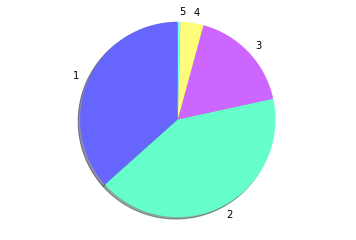

In [214]:
contigbin = contigstrains>0.01
contigsums = Counter(contigbin.sum(axis=0)[1:])
clabels = [x for x in contigsums]
ccounts = [count for label,count in contigsums.items()]

fig1, ax1 = plt.subplots()
ax1.pie(ccounts, labels=clabels, shadow=True, startangle=90, colors=["#6666FF","#66FFCC","#CC66FF","#FFFC79","#73FDFF"])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#plt.savefig("figures/NumClustersContigsPieChart.png")
plt.show()

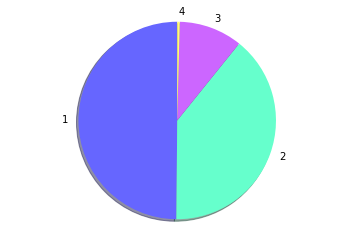

In [191]:
contigbin = contigperc>5
contigsums = Counter(contigbin.sum(axis=0)[1:])
clabels = [x for x in contigsums]
ccounts = [count for label,count in contigsums.items()]

fig1, ax1 = plt.subplots()
ax1.pie(ccounts, labels=clabels, shadow=True, startangle=90, colors=["#6666FF","#66FFCC","#CC66FF","#FFFC79","#73FDFF"])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#plt.savefig("figures/NumClustersContigsPieChart.png")
plt.show()

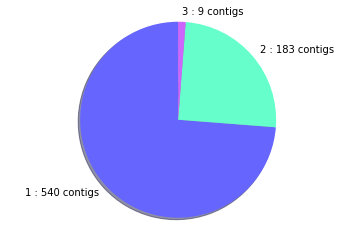

In [15]:
contigbin = contigenrich>0
contigsums = Counter(contigbin.sum(axis=0)[1:])
clabels = [str(x[0])+" : "+str(x[1])+" contigs" for x in contigsums.items()]
ccounts = [count for label,count in contigsums.items()]

fig1, ax1 = plt.subplots()
ax1.pie(ccounts, labels=clabels, shadow=True, startangle=90, colors=["#6666FF","#66FFCC","#CC66FF","#FFFC79","#73FDFF"])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig("figures/contig_enriched_piechart.png")
plt.show()

## metrics


In [76]:
print(np.max(contigenrich, axis=1))
print(np.min(contigenrich, axis=1))
print(np.std(contigenrich, axis=1))
print(np.mean(contigenrich, axis=1))
print(np.median(contigenrich, axis=1))

0    4.482976
1    8.246008
2    6.162592
3    4.000000
4    5.000000
dtype: float64
0   -1.0
1   -1.0
2   -1.0
3   -1.0
4   -1.0
dtype: float64
0    1.702037
1    2.439974
2    1.996612
3    1.125419
4    1.659918
dtype: float64
0   -0.066911
1   -0.118937
2   -0.165493
3   -0.238731
4    0.492987
dtype: float64
[-1.         -1.         -1.         -0.9528415  -0.44630903]


In [219]:
#average degree of enrichment where enrichment is seen
print(np.mean(contigenrich[contigenrich>0], axis=1))
print(np.std(contigenrich[contigenrich>0], axis=1))
print(np.mean(np.mean(contigenrich[contigenrich>0])))
print(np.std(np.std(contigenrich[contigenrich>0])))

print("how many contigs are missing from cluster (value -1):")
print(np.sum(contigenrich[contigenrich==-1], axis=1)*-1)


0    2.673841
1    5.246472
2    3.974198
3    1.409004
4    2.156194
dtype: float64
0    1.220989
1    3.333628
2    2.002326
3    0.796623
4    0.963707
dtype: float64
3.027125007823682
0.4303310043235825
how many contigs are missing from cluster (value -1):
0    522.0
1    560.0
2    561.0
3    350.0
4    279.0
dtype: float64


In [223]:
from scipy.stats import ttest_1samp

for cluster, row in contigenrich.iterrows():
    print("cluster", cluster+1)
    print(ttest_1samp(row[row>-1], popmean=0))

cluster 1
Ttest_1sampResult(statistic=20.2183203225391, pvalue=3.556093176647399e-51)
cluster 2
Ttest_1sampResult(statistic=9.387753609392123, pvalue=3.655233353616086e-17)
cluster 3
Ttest_1sampResult(statistic=12.364958133739528, pvalue=1.6864644008677604e-25)
cluster 4
Ttest_1sampResult(statistic=7.5200136040039265, pvalue=3.9483976002511855e-13)
cluster 5
Ttest_1sampResult(statistic=20.071837577454225, pvalue=1.4160643655111183e-64)


In [232]:
from scipy.stats import mannwhitneyu

#the mann whitney test is nonparametric so this is probably better than the t test above since we definitely have this odd bimodal distribution

for cluster, row in contigenrich.iterrows():
    print("cluster", cluster+1)
    print(mannwhitneyu(row, [0]*len(row)))

cluster 1
MannwhitneyuResult(statistic=134872.0, pvalue=1.1265309467523867e-73)
cluster 2
MannwhitneyuResult(statistic=71834.0, pvalue=7.361817276910011e-159)
cluster 3
MannwhitneyuResult(statistic=87227.0, pvalue=2.2276560497882467e-135)
cluster 4
MannwhitneyuResult(statistic=149532.0, pvalue=8.86271886657371e-57)
cluster 5
MannwhitneyuResult(statistic=244089.0, pvalue=0.0005724548344937637)


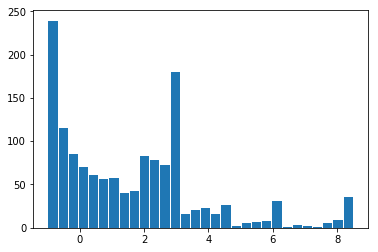

In [200]:
hist, bins = np.histogram(contigenrich, range=(-0.99,8.5), bins=30)
width = 0.9 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

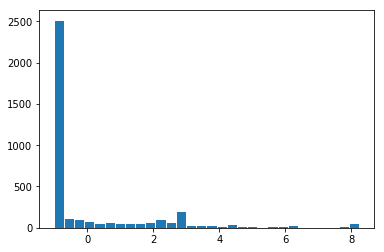

In [207]:
#and just to show the huge point mass at -1
hist, bins = np.histogram(contigenrich, bins=30)
width = 0.9 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

## what's cluster membership of TARA sites?

In [6]:
genes.index = genes['index']
Tgenes = genes.T
Tgenes['gene'] = Tgenes.index
merged = labels.merge(Tgenes, on="gene")
print(labels.shape, Tgenes.shape, merged.shape)

(24317, 2) (51712, 199) (24317, 200)


In [7]:
merged.head()

,cluster,gene,ERR599095,ERR598955,ERR315856,ERR315857,ERR594329,ERR594288,ERR599092,ERR598993,...,ERR598958,ERR598964,ERR598963,ERR598996,ERR599170,ERR598986,ERR598976,ERR598944,ERR599001,ERR599078
0,5,fig|1123864.3.peg.533|VBISARClu237429_0533|,1,1,1,1,1,0,1,0,...,0,0,0,1,1,1,1,0,1,1
1,5,fig|1123864.3.rna.19|VBISARClu237429_r019|,1,1,0,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,2,fig|1123864.3.rna.21|VBISARClu237429_r021|,1,1,0,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,4,fig|1123864.3.rna.25|VBISARClu237429_r025|,1,1,0,0,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
4,2,fig|1123864.3.rna.9|VBISARClu237429_r009|,1,1,0,0,1,1,1,1,...,0,1,1,1,1,1,1,0,1,1


In [17]:
cluster_membership = pd.DataFrame()
for gene in merged.columns[2:]:
    total_genes = np.sum(merged[gene])
    for clust in set(merged['cluster']):
        subset = merged[merged['cluster']==clust]
        count_percent = np.sum(subset[gene])/total_genes
        cluster_membership.loc[clust,gene] = count_percent

In [18]:
cluster_membership = cluster_membership.T

In [10]:
run_keys = pd.read_csv('../satellite_models/get_gene_data/runs_samples_keys.csv')
sampleinfo = pd.read_csv("../satellite_models/get_env_data/env_remote_data_TARA.csv")
env = run_keys.merge(sampleinfo,on='tara_label')

In [19]:
new = cluster_membership
cluster_membership.columns = ['cluster1','cluster2','cluster3','cluster4','cluster5']
cluster_membership['run_id'] = cluster_membership.index
new = env[['run_id','longitude']].merge(cluster_membership, on='run_id')
new = new.sort_values('longitude')
new

,run_id,longitude,cluster1,cluster2,cluster3,cluster4,cluster5
166,ERR598995,-159.0460,0.530370,0.007929,0.007504,0.129407,0.324791
167,ERR598980,-159.0224,0.126511,0.032666,0.251133,0.378021,0.211669
168,ERR599142,-158.9958,0.003445,0.009224,0.372527,0.499000,0.115804
164,ERR599032,-153.6858,0.026843,0.268429,0.068346,0.541813,0.094569
165,ERR599038,-153.6759,0.018598,0.266503,0.087063,0.531780,0.096056
160,ERR594344,-142.5571,0.017980,0.389388,0.067513,0.470650,0.054469
161,ERR599119,-142.5571,0.011935,0.312142,0.099257,0.522226,0.054439
163,ERR594323,-142.5571,0.454217,0.268617,0.012728,0.200798,0.063640
162,ERR594339,-142.5571,0.485320,0.273965,0.007194,0.172079,0.061443
159,ERR594300,-142.5461,0.006732,0.375823,0.019599,0.558049,0.039797


In [20]:
sites = new['run_id']
lons = new['longitude']
colors = ["#6666FF", "#66FFCC", "#FFCC66", "#CC66FF", "#FFA5CA", "#07A6DE", "#FF6666"]

sites = round(new['longitude'], 1).astype(str)+"             "+new['run_id']

traces = []
for ix,clust in enumerate(new.columns[2:]):
    trace = go.Bar(
        x=sites,
        y=new[clust],
        name="c"+str(clust),
        marker=dict(color=colors[ix])
    )
    traces.append(trace)

data = traces
layout = go.Layout(
    barmode='stack',
    width = 1200,
    height = 700
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig, filename='stacked-bar')

In [164]:
#sites = new['run_id']
lons = new['longitude']
colors = ["#6666FF", "#66FFCC", "#FFCC66", "#CC66FF", "#FFA5CA", "#07A6DE", "#FF6666"]

new_latsort = env[['run_id','latitude']].merge(cluster_membership, on='run_id')
new_latsort = new_latsort.sort_values("latitude")

sites = round(new_latsort['latitude'], 1).astype(str)+"             "+new_latsort['run_id']

traces = []
for ix,clust in enumerate(new_latsort.columns[2:]):
    trace = go.Bar(
        x=sites,
        y=new_latsort[clust],
        name="c"+str(clust),
        marker=dict(color=colors[ix])
    )
    traces.append(trace)

data = traces
layout = go.Layout(
    barmode='stack',
    width=1200,
    height=700,
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig, filename='stacked-bar')

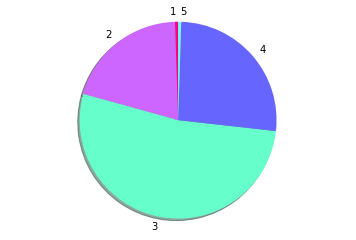

In [80]:
labels = [x for x in Counter(np.sum(cluster_membership[[1,2,3,4,5]]>0.1, axis=1))]
counts = [count for label,count in Counter(np.sum(cluster_membership[[1,2,3,4,5]]>0.1, axis=1)).items()]

import matplotlib.pyplot as plt
%matplotlib inline 

fig1, ax1 = plt.subplots()
ax1.pie(counts, labels=labels, shadow=True, startangle=90, colors=["#FF0080", "#CC66FF", "#66FFCC", "#6666FF", "#73FDFF", "#FFFC79", "#FF6666"])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

#plt.savefig("figures/NumClustersPerSitePiechart.png")
plt.show()

In [23]:
#shannon diversity TARA sites
newinfo = env[['run_id','longitude', 'latitude','tara_label']].merge(cluster_membership, on='run_id')

print("maximum value of Shannon H (all clusters equally proportional): ", np.log(5))
print("(minimum value is zero)")
shannon = -1*np.sum(newinfo[['cluster1','cluster2','cluster3','cluster4','cluster5']]*np.log(newinfo[['cluster1','cluster2','cluster3','cluster4','cluster5']]), axis=1)
print("minimum H in TARA sites: ", np.min(shannon))
print("maximum H in TARA sites: ", np.max(shannon))
newinfo['shannon'] = shannon
newinfo.sort_values('shannon', ascending=False)

maximum value of Shannon H (all clusters equally proportional):  1.6094379124341003
(minimum value is zero)
minimum H in TARA sites:  0.6991062590755023
maximum H in TARA sites:  1.5315487035796012


/Users/Adrienne/anaconda/envs/nb/lib/python3.4/site-packages/ipykernel_launcher.py:6: RuntimeWarning:

divide by zero encountered in log



,run_id,longitude,latitude,tara_label,cluster1,cluster2,cluster3,cluster4,cluster5,shannon
108,ERR599071,-111.6906,-25.8076,TARA_098_MES_0.22-3,0.165788,0.075707,0.259703,0.283182,0.215621,1.531549
43,ERR599002,53.9601,-16.9534,TARA_052_DCM_0.22-1.6,0.219395,0.081488,0.199975,0.379450,0.119693,1.480769
76,ERR594349,-3.1759,-20.4091,TARA_070_SRF_0.22-0.45,0.219299,0.034900,0.196315,0.304141,0.245344,1.476194
101,ERR599008,-49.5017,-61.9689,TARA_085_MES_0.22-3,0.140312,0.101336,0.104677,0.367483,0.286192,1.469722
73,ERR594308,-3.1641,-20.4075,TARA_070_MES_0.22-0.45,0.211276,0.046552,0.148952,0.339733,0.253486,1.469527
75,ERR599165,-3.1759,-20.4091,TARA_070_SRF_0.22-3,0.220619,0.039673,0.144330,0.330252,0.265126,1.458680
172,ERR599099,-116.6468,14.2075,TARA_137_DCM_0.22-3,0.131931,0.298917,0.047801,0.337795,0.183556,1.451327
77,ERR594335,-3.1759,-20.4091,TARA_070_SRF_0.45-0.8,0.233432,0.036458,0.124797,0.339705,0.265609,1.438954
173,ERR599127,-116.6433,14.2025,TARA_137_MES_0.22-3,0.139876,0.227975,0.046754,0.398764,0.186631,1.435304
185,ERR599047,-71.2907,34.6663,TARA_146_MES_0.22-3,0.308370,0.062303,0.072373,0.320327,0.236627,1.431474


In [24]:
newinfo.to_csv("ClusterProportionShannon.csv", index=False)

In [25]:
newinfo.sort_values('cluster2', ascending=False)

,run_id,longitude,latitude,tara_label,cluster1,cluster2,cluster3,cluster4,cluster5,shannon
133,ERR594309,-139.2393,-8.9729,TARA_122_MES_0.1-0.22,0.031209,0.618336,0.042913,0.256177,0.051365,1.041945
137,ERR594292,-139.1963,-8.9971,TARA_122_SRF_0.1-0.22,0.023998,0.526719,0.047254,0.341663,0.060366,1.107799
144,ERR594319,-140.2845,-8.9109,TARA_123_MIX_0.45-0.8,0.227377,0.441499,0.018053,0.278336,0.034735,1.242893
155,ERR594296,-140.5216,-9.1504,TARA_124_SRF_0.45-0.8,0.007915,0.399873,0.028653,0.512427,0.051132,1.001257
141,ERR594293,-140.2845,-8.9109,TARA_123_MIX_0.1-0.22,0.246711,0.396030,0.016617,0.300485,0.040157,1.270588
140,ERR594306,-139.1963,-8.9971,TARA_122_SRF_0.45-0.8,0.005064,0.391284,0.063373,0.485806,0.054473,1.077987
160,ERR594344,-142.5571,-8.9111,TARA_125_SRF_0.1-0.22,0.017980,0.389388,0.067513,0.470650,0.054469,1.134703
129,ERR594284,-139.1394,-9.0063,TARA_122_DCM_0.1-0.22,0.291041,0.381706,0.028970,0.242489,0.055794,1.334034
159,ERR594300,-142.5461,-8.8999,TARA_125_MIX_0.45-0.8,0.006732,0.375823,0.019599,0.558049,0.039797,0.932349
124,ERR599086,-100.6715,-16.9486,TARA_111_MES_0.22-3,0.115804,0.375639,0.027117,0.252056,0.229384,1.400377


## does proportion c1/c5 and c3/c4 reflect true relative abundance SAR86E/A at TARA sites?

In [129]:
relative = pd.read_csv("relativeAbundanceSAR86.csv", index_col="species_id")
relative = relative.T
relative.head()

species_id,SAR86A,SAR86E
ERR315856,0.000129,0.006733
ERR315857,0.000177,0.002570
ERR315858,0.000164,0.000334
ERR315859,0.000000,0.000605
ERR315862,0.000000,0.000000


In [145]:
miniclusters = merged[merged['cluster'].isin([1,3,4,5])]
mini_membership = pd.DataFrame()
for site in miniclusters.columns[2:]:
    total_genes = np.sum(miniclusters[site])
    for clust in set(miniclusters['cluster']):
        subset = miniclusters[miniclusters['cluster']==clust]
        count_percent = np.sum(subset[site])/total_genes
        mini_membership.loc[clust,site] = count_percent

In [149]:
mini_membership = mini_membership.T

In [150]:
relative['site'] = relative.index
relative['SAR86Apercent'] = relative['SAR86A']/(relative['SAR86A']+relative['SAR86E']) * 100
relative['SAR86Epercent'] = relative['SAR86E']/(relative['SAR86A']+relative['SAR86E']) * 100

mini_membership['site'] = mini_membership.index
relmerge = relative.merge(mini_membership, on='site').dropna()
relmerge.head()

,SAR86A,SAR86E,site,SAR86Apercent,SAR86Epercent,1,3,4,5
0,0.000129,0.006733,ERR315856,1.882667,98.117333,0.107672,0.121025,0.315489,0.455815
1,0.000177,0.002570,ERR315857,6.457563,93.542437,0.022215,0.188323,0.367493,0.421969
2,0.000164,0.000334,ERR315858,32.994751,67.005249,0.058891,0.220238,0.261525,0.459347
3,0.000000,0.000605,ERR315859,0.000000,100.000000,0.106860,0.149282,0.220164,0.523694
5,0.000294,0.000116,ERR318620,71.732117,28.267883,0.091978,0.171903,0.298064,0.438056


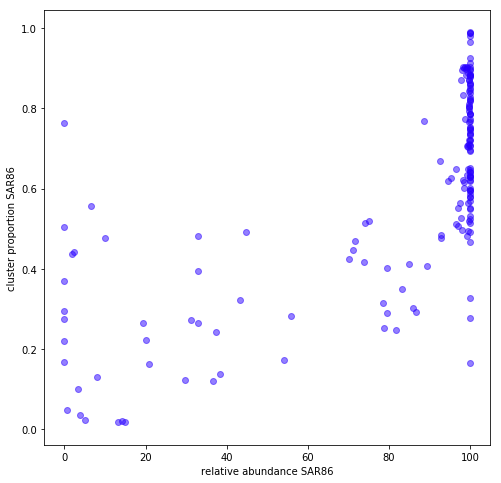

In [412]:
plt.figure(figsize=(8,8))
#plt.scatter(x=relmerge['SAR86Epercent'],y=relmerge[1]+relmerge[5], c='#FF0028', alpha=0.5)
plt.scatter(x=relmerge['SAR86Apercent'],y=relmerge[3]+relmerge[4], c='#2800FF', alpha=0.5)
plt.xlabel('relative abundance SAR86A')
plt.ylabel('relative proportion of cluster 3 and 4')
#plt.legend(labels=['SAR86E','SAR86A'])
plt.savefig("figures/genome_RelabunVsClusterproportion.png")
plt.show()

In [152]:
from scipy.stats.stats import pearsonr

pearsonr(x=relmerge['SAR86Epercent'],y=relmerge[1]+relmerge[5])

(0.7032180554214483, 1.584339595164992e-26)

In [153]:
pearsonr(x=relmerge['SAR86Apercent'],y=relmerge[3]+relmerge[4])

(0.7032180554214483, 1.584339595164992e-26)

# TARA station map

In [10]:
mapdata = pd.read_csv("mapinfo.csv")
mapdata

,CRUISE,Station ID,STATION,LAT,LONG,sample_label,Date/Time [yyyy-mm-ddThh:mm],depth.id,size.frac.lower,size.frac.upper
0,TARA,TARA_124_MIX_0.22-0.45,TARA_124,-9.0714,-140.5973,TARA_124_MIX_0.22-0.45,2011-08-05T17:31:19,MIX,0.22,0.45
1,TARA,TARA_124_SRF_0.22-3,TARA_124,-9.1504,-140.5216,TARA_124_SRF_0.22-3,2011-08-04T18:33,SRF,0.22,3.00
2,TARA,TARA_124_SRF_0.22-3,TARA_124,-9.1504,-140.5216,TARA_124_SRF_0.22-3,2011-08-04T18:33,SRF,0.22,3.00
3,TARA,TARA_124_SRF_0.22-3,TARA_124,-9.1504,-140.5216,TARA_124_SRF_0.22-3,2011-08-04T18:33,SRF,0.22,3.00
4,TARA,TARA_124_SRF_0.22-3,TARA_124,-9.1504,-140.5216,TARA_124_SRF_0.22-3,2011-08-04T18:33,SRF,0.22,3.00
5,TARA,TARA_124_SRF_0.1-0.22,TARA_124,-9.1504,-140.5216,TARA_124_SRF_0.1-0.22,2011-08-04T18:33,SRF,0.10,0.22
6,TARA,TARA_124_MIX_0.45-0.8,TARA_124,-9.0714,-140.5973,TARA_124_MIX_0.45-0.8,2011-08-05T17:31:19,MIX,0.45,0.80
7,TARA,TARA_123_SRF_0.45-0.8,TARA_123,-8.9068,-140.2830,TARA_123_SRF_0.45-0.8,2011-07-31T17:20,SRF,0.45,0.80
8,TARA,TARA_124_MIX_0.22-3,TARA_124,-9.0714,-140.5973,TARA_124_MIX_0.22-3,2011-08-05T17:31:19,MIX,0.22,3.00
9,TARA,TARA_124_MIX_0.22-3,TARA_124,-9.0714,-140.5973,TARA_124_MIX_0.22-3,2011-08-05T17:31:19,MIX,0.22,3.00


In [35]:
print(len(mapdata))
print(len(set(mapdata["Station ID"])))

105
75


In [11]:
set(mapdata['depth.id'])

{'DCM', 'MES', 'MES.OMZ', 'MIX', 'SRF'}

In [12]:
colors=['green','yellow','red','turquoise','purple']
depths = ['DCM','SRF','MES.OMZ','MIX','MES']

traces = []
for ix, dep in enumerate(depths): 
    #ix,subset in enumerate(mapdata.groupby('depth.id')):
    #ix = int(subset[0])
    data = pd.DataFrame(mapdata[mapdata['depth.id']==dep])
    traces.append(
            go.Scattergeo(
            lon = data['LONG'],
            lat = data['LAT'],
            name = list(data['depth.id'])[0],
            hovertext=data['sample_label'],
            mode = 'markers',
            marker = dict(
                size = 8,
                opacity = 0.4,
                symbol = 'circle',
                color = colors[ix])
            )
    )
data = go.Data(traces)

layout = go.Layout(
        title = 'TARA stations by depth',
        geo = dict(
            scope="world",
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5
        ),
    )

fig = go.Figure(data=data, layout=layout)
py.offline.iplot( fig, validate=False, filename='clustermap' )

# TARA cluster membership map

In [128]:
newinfo = env[['run_id','longitude', 'latitude','tara_label']].merge(cluster_membership, on='run_id')
newdata = newinfo.merge(mapdata[['STATION', 'sample_label','depth.id']], left_on='tara_label',right_on='sample_label')

clustermap_data = []
for stn in set(newdata['STATION']):
    subset = newdata[newdata['STATION']==stn]
    #take avg cluster values
    means = list(subset[['latitude','longitude',1,2,3,4,5]].mean(axis=0))
    means.append(list(subset['STATION'])[0])
    clustermap_data.append(means)
clustermap_data = pd.DataFrame(clustermap_data, columns=['latitude','longitude',1,2,3,4,5,'STATION'])

In [168]:
clusters = ['cluster 1', 'cluster 2', 'cluster 3', 'cluster 4', 'cluster 5']

#newinfo = env[['run_id','longitude', 'latitude','tara_label']].merge(cluster_membership, on='run_id')
#newdata = newinfo.merge(mapdata[['STATION', 'sample_label','depth.id']], left_on='tara_label',right_on='sample_label')

for clust in range(1,6):
    
    traces = []
    traces.append(
            go.Scattergeo(
            lon = clustermap_data['longitude'],
            lat = clustermap_data['latitude'],
            name = clustermap_data['STATION'], #list(data['depth.id'])[0],
            hovertext=clustermap_data[clust],
            mode = 'markers',
            marker = dict(
                size = 8,
                opacity = clustermap_data[clust]*2,
                symbol = 'circle',
                color = 'black'
            )
    ))
    data = go.Data(traces)

    layout = go.Layout(
            title = 'TARA stations by cluster'+str(clust)+' membership',
            geo = dict(
                scope="world",
                showland = True,
                landcolor = "rgb(250, 250, 250)",
                subunitcolor = "rgb(217, 217, 217)",
                countrycolor = "rgb(217, 217, 217)",
                countrywidth = 0.5,
                subunitwidth = 0.5
            ),
        )

    fig = go.Figure(data=data, layout=layout)
    py.offline.iplot( fig, validate=False, filename='clustermap' )

In [63]:
traces = []
for clust in range(1,6):
    trace = go.Histogram(
        x=new[clust],
        opacity=0.3,
        xbins=dict(start=0, size=0.025, end=1),
        name="cluster "+str(clust)
    )
    traces.append(trace)

layout = go.Layout(barmode='overlay')
#fig = ff.create_distplot(data, bin_size=0.2, layout=layout)
fig = go.Figure(data=traces, layout=layout)
py.offline.iplot(fig)

# Function Enrichment in Clusters

In [6]:
split = [str(x).split("||") for x in labeled_annotations["PFams"]]
id = []
for s in split:
    temp = []
    for br in s:
        if 'PF' in br:
            temp.append(br)
    if len(temp)>0:
        id.append(temp[0])
    else:
        id.append(np.nan)
        
labeled_annotations['parsed_PFams'] = id

In [7]:
sorted_pfams = [x for x, count in Counter(labeled_annotations['parsed_PFams']).most_common()][1:]

In [8]:
pfam_enriched = pd.DataFrame()
pfam_counts = pd.DataFrame()

for pfam in sorted_pfams:
    col = []
    counts = []
    
    #total percent genes annotated to pfam
    total_genes_in_pfam = labeled_annotations[labeled_annotations['parsed_PFams']==pfam]
    
    overall = len(total_genes_in_pfam)/len(labeled_annotations)
    
    #expected_pfam_in_clusters = len(total_genes_in_pfam)/5.0
    #pfam_enriched.loc[pfam,'overall'] = overall
    for clust in range(1,6):
        total_genes_in_clust = labeled_annotations[labeled_annotations['cluster']==clust]
        #expected number genes with this annotation in this cluster is proportional to total number of genes in cluster
        expected_pfam_in_clusters = (len(total_genes_in_clust)/len(labeled_annotations)) * len(total_genes_in_pfam)
        
        pfam_in_cluster = total_genes_in_clust[total_genes_in_clust['parsed_PFams']==pfam]
        col.append((len(pfam_in_cluster) - expected_pfam_in_clusters)/expected_pfam_in_clusters)
        
        counts.append(len(pfam_in_cluster)/len(total_genes_in_clust))
        
    counts.append(overall)
        
    pfam_enriched[pfam] = col
    pfam_counts[pfam] = counts
    
pfam_counts.index = ['c1','c2','c3','c4','c5','overall']

In [9]:
pfam_enriched

,PF00106,PF07715,PF02771,PF00005,PF00378,PF00501,PF12697,PF01618,PF01926,PF13417,...,PF14863,PF01432,PF07728,PF08282,PF07510,PF08340,PF13304,PF05000,PF00120,PF02817
0,0.099280,0.053291,-0.010160,0.277993,0.248460,0.211751,-0.004161,0.107076,-0.087148,-0.087148,...,-1.000000,-1.000000,-1.000000,4.477114,-1.000000,4.477114,-1.000000,4.477114,-1.000000,-1.000000
1,-0.118567,-0.049090,-0.273929,0.236183,-0.250109,-0.343620,-0.157148,-0.112315,0.339198,-0.117012,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
2,-0.193810,0.070182,-0.612082,-0.046009,-0.579122,-0.303502,-0.277279,-0.010488,0.112990,0.192489,...,-1.000000,6.154934,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,6.154934
3,0.049953,-0.013443,0.158907,-0.038107,0.037335,-0.120393,0.198318,-0.113148,-0.180610,-0.122082,...,2.206309,-1.000000,2.206309,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2.206309,-1.000000
4,0.023923,-0.038971,0.261276,-0.224549,0.197387,0.303856,-0.020895,0.113680,0.077015,0.153945,...,-1.000000,-1.000000,-1.000000,-1.000000,2.877255,-1.000000,2.877255,-1.000000,-1.000000,-1.000000


In [10]:
trace = go.Heatmap(z=[row[0:405] for ix,row in pfam_enriched.iterrows()],
                   x=pfam_enriched.columns[0:405],
                   y=['c1','c2','c3','c4','c5'],
                   colorscale=[[-1.0, 'rgb(40,0,255)'], [1.0, 'rgb(255,0,40)']],
                   zmin=-1,
                   zmax=1
                  )

layout = go.Layout(width=2000,height=600)
data=[trace]
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig, filename='cluster-heatmap')

In [78]:
print(np.max(pfam_enriched[pfam_enriched.columns[0:405]], axis=1))
print(np.min(pfam_enriched[pfam_enriched.columns[0:405]], axis=1))
print(np.std(pfam_enriched[pfam_enriched.columns[0:405]], axis=1))
print(np.mean(pfam_enriched[pfam_enriched.columns[0:405]], axis=1))
print(np.median(pfam_enriched[pfam_enriched.columns[0:405]], axis=1))

0    1.086520
1    1.207470
2    1.384978
3    0.551440
4    0.705992
dtype: float64
0   -0.804389
1   -1.000000
2   -1.000000
3   -0.541956
4   -0.630738
dtype: float64
0    0.271186
1    0.362942
2    0.333038
3    0.192633
4    0.216479
dtype: float64
0    0.028365
1    0.100458
2    0.028434
3   -0.055219
4   -0.010725
dtype: float64
[ 0.04325978  0.11256489  0.02213339 -0.06482643 -0.02089531]


In [11]:
#average degree of enrichment where enrichment is seen
print(np.mean(np.mean(pfam_enriched[pfam_enriched>0][pfam_enriched.columns[0:405]])))
print(np.std(np.std(pfam_enriched[pfam_enriched>0][pfam_enriched.columns[0:405]])))

print(np.mean(pfam_enriched[pfam_enriched>0][pfam_enriched.columns[0:405]], axis=1))
print(np.std(pfam_enriched[pfam_enriched>0][pfam_enriched.columns[0:405]], axis=1))


0.25049192173953766
0.09670722973480939
0    0.219792
1    0.325987
2    0.259909
3    0.138543
4    0.169240
dtype: float64
0    0.172244
1    0.235625
2    0.236086
3    0.127433
4    0.131610
dtype: float64


In [242]:
np.sum(list(pfam_counts.loc['overall']*len(labeled_annotations)>20))

405

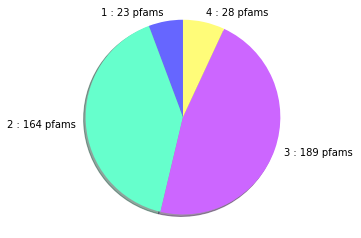

In [245]:
pfambin = pfam_enriched[pfam_enriched.columns[0:405]]>0
pfamsums = Counter(pfambin.sum(axis=0)[1:])
plabels = [str(x[0])+" : "+str(x[1])+" pfams" for x in pfamsums.items()]
pcounts = [count for label,count in pfamsums.items()]

fig1, ax1 = plt.subplots()
ax1.pie(pcounts, labels=plabels, shadow=True, startangle=90, colors=["#6666FF","#66FFCC","#CC66FF","#FFFC79","#73FDFF"])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig("figures/pfam_enriched_piechart.png")
plt.show()

# metrics

are clusters' functional enrichments significantly diff than overall pangenome? Answer: sort of

note c2 is the cluster that predicts genes to be present at negative longitudes - aka Pacific basin. This is also the only locations where we have mesopelagic samples; given that we know functional capabilities stratify with depth, this seems the likely culprit to this one cluster being functionally different than the others; you also see that TARA sites with particularly high proportions of cluster 2 genes encompass most of the mesopelagic TARA samples, although this isn't uniformly true

In [13]:
from scipy.stats import ttest_1samp

for cluster, row in pfam_enriched[pfam_enriched.columns[0:405]].iterrows():
    print("c",cluster+1)
    print(np.mean(row[row>-1]))
    print(np.std(row[row>-1]))
    print(ttest_1samp(row[row>-1], popmean=0))

c 1
0.028365249925634765
0.2711860990656424
Ttest_1sampResult(statistic=2.10237349699577, pvalue=0.03613889606377498)
c 2
0.11143510552642003
0.34762079118263584
Ttest_1sampResult(statistic=6.411302681137582, pvalue=4.0706113286266087e-10)
c 3
0.033537404785952116
0.3258672440497836
Ttest_1sampResult(statistic=2.0634871634772654, pvalue=0.03970779478727317)
c 4
-0.0552190135920449
0.19263255414247862
Ttest_1sampResult(statistic=-5.761686761528132, pvalue=1.6532680733741613e-08)
c 5
-0.010725028325584246
0.21647887051872922
Ttest_1sampResult(statistic=-0.9958034282684861, pvalue=0.31994171477523115)


In [239]:
from scipy.stats import mannwhitneyu

for cluster, row in pfam_enriched[pfam_enriched.columns[0:405]].iterrows():
    print("cluster", cluster+1)
    print(mannwhitneyu(row, [0]*len(row)))

cluster 1
MannwhitneyuResult(statistic=74115.0, pvalue=0.0056101276325146365)
cluster 2
MannwhitneyuResult(statistic=63585.0, pvalue=1.6348933777061172e-09)
cluster 3
MannwhitneyuResult(statistic=75330.0, pvalue=0.015947904286620976)
cluster 4
MannwhitneyuResult(statistic=61155.0, pvalue=1.0622990265945164e-11)
cluster 5
MannwhitneyuResult(statistic=78165.0, pvalue=0.10836304880104652)


In [409]:
new.sort_values(2, ascending=False).merge(env[['run_id','depth_sampled', 'tara_label']], on='run_id')

,run_id,longitude,1,2,3,4,5,depth_sampled,tara_label
0,ERR594309,-139.2393,0.031209,0.618336,0.042913,0.256177,0.051365,600,TARA_122_MES_0.1-0.22
1,ERR594292,-139.1963,0.023998,0.526719,0.047254,0.341663,0.060366,5,TARA_122_SRF_0.1-0.22
2,ERR594319,-140.2845,0.227377,0.441499,0.018053,0.278336,0.034735,150,TARA_123_MIX_0.45-0.8
3,ERR594296,-140.5216,0.007915,0.399873,0.028653,0.512427,0.051132,5,TARA_124_SRF_0.45-0.8
4,ERR594293,-140.2845,0.246711,0.396030,0.016617,0.300485,0.040157,150,TARA_123_MIX_0.1-0.22
5,ERR594306,-139.1963,0.005064,0.391284,0.063373,0.485806,0.054473,5,TARA_122_SRF_0.45-0.8
6,ERR594344,-142.5571,0.017980,0.389388,0.067513,0.470650,0.054469,5,TARA_125_SRF_0.1-0.22
7,ERR594284,-139.1394,0.291041,0.381706,0.028970,0.242489,0.055794,115,TARA_122_DCM_0.1-0.22
8,ERR594300,-142.5461,0.006732,0.375823,0.019599,0.558049,0.039797,140,TARA_125_MIX_0.45-0.8
9,ERR599086,-100.6715,0.115804,0.375639,0.027117,0.252056,0.229384,350,TARA_111_MES_0.22-3


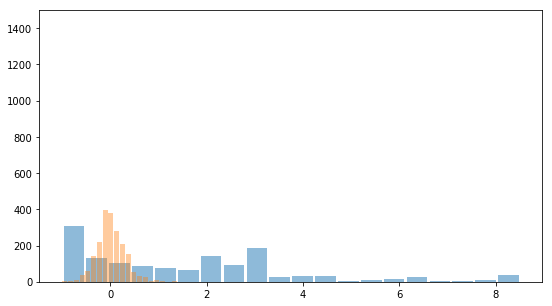

In [206]:
contigbins = [-1., -0.99        , -0.53769962, -0.07539924,  0.38690114,  0.84920152,
         1.3115019 ,  1.77380228,  2.23610266,  2.69840304,  3.16070342,
         3.6230038 ,  4.08530418,  4.54760456,  5.00990494,  5.47220532,
         5.9345057 ,  6.39680608,  6.85910646,  7.32140684,  7.78370722,
         8.2460076 ]
hist, bins = np.histogram(contigenrich, range=(-0.99,8.5), bins=20)
width = 0.9 * (bins[3] - bins[2])
center = (bins[:-1] + bins[1:]) / 2


phist, pbins = np.histogram(pfam_enriched[pfam_enriched.columns[0:405]], bins=20)
pwidth = 0.9 * (pbins[1] - pbins[0])
pcenter = (pbins[:-1] + pbins[1:]) / 2

plt.figure(figsize=(9,5))

plt.bar(center, hist, align='center', width=width, alpha=0.5)
plt.bar(pcenter, phist, align='center', width=pwidth, alpha=0.4)
plt.ylim(0,1500)
plt.show()

# TonB

In [5]:
labeled_annotations

,cluster,gene,orf_id,orf_contam_type,kegg_hit,kegg_desc,kegg_pathway,KO,KO_desc,KO_pathway,...,best_hit_group,PFams,PFams_desc,TIGRFams,TIGRFams_desc,transporter_family,transporter_substrate,transporter_evidence,transmembrane_domains,Unnamed: 33
0,5,fig|1123864.3.peg.533|VBISARClu237429_0533|,fig|1123864.3.peg.533|VBISARClu237429_0533|,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
1,5,fig|1123865.4.peg.19|VBISARClu228887_0019|,fig|1123865.4.peg.19|VBISARClu228887_0019|,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,PF00133||_GAP_||PF08264,"tRNA synthetases class I (I, L, M and V)||_GAP...",TIGR00422,valine--tRNA ligase,NaN,NaN,NaN,0,NaN
2,5,fig|1123865.4.peg.302|VBISARClu228887_0302|,fig|1123865.4.peg.302|VBISARClu228887_0302|,NaN,aci:ACIAD2950,valS; valyl-tRNA synthetase (EC:6.1.1.9); K018...,aci00970,K01873,valyl-tRNA synthetase [EC:6.1.1.9],Aminoacyl-tRNA biosynthesis,...,NaN,PF00133,"tRNA synthetases class I (I, L, M and V)",NaN,NaN,NaN,NaN,NaN,0,NaN
3,5,fig|1123865.4.peg.303|VBISARClu228887_0303|,fig|1123865.4.peg.303|VBISARClu228887_0303|,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,_GAP_||PF00883,"_GAP_||Cytosol aminopeptidase family, catalyti...",NaN,NaN,NaN,NaN,NaN,0,NaN
4,5,fig|1123865.4.peg.449|VBISARClu228887_0449|,fig|1123865.4.peg.449|VBISARClu228887_0449|,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,PF02874||_GAP_||PF00006||PF00306,"ATP synthase alpha/beta family, beta-barrel do...",TIGR00962,"ATP synthase F1, alpha subunit",F-ATPase,NaN,2.0,0,NaN
5,5,fig|1123865.4.peg.452|VBISARClu228887_0452|,fig|1123865.4.peg.452|VBISARClu228887_0452|,NaN,tkm:TK90_2592,"ATP synthase F0, C subunit; K02110 F-type H+-t...",tkm00190||tkm01100,K02110,F-type H+-transporting ATPase subunit c,Oxidative phosphorylation || Photosynthesis,...,NaN,PF00137,ATP synthase subunit C,TIGR01260,"ATP synthase F0, C subunit",F-ATPase,NaN,3.0,2,NaN
6,5,fig|1123865.4.peg.747|VBISARClu228887_0747|,fig|1123865.4.peg.747|VBISARClu228887_0747|,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,_GAP_||PF01939,_GAP_||Protein of unknown function DUF91,NaN,NaN,NaN,NaN,NaN,0,NaN
7,3,fig|1123866.3.peg.1001|VBISARClu227658_1001|,fig|1123866.3.peg.1001|VBISARClu227658_1001|,NaN,gpb:HDN1F_23580,argS; arginyl-tRNA synthetase; K01887 arginyl-...,gpb00970,K01887,arginyl-tRNA synthetase [EC:6.1.1.19],Aminoacyl-tRNA biosynthesis,...,NaN,PF03485||PF00750||PF05746,Arginyl tRNA synthetase N terminal domain||tRN...,TIGR00456,arginine--tRNA ligase,NaN,NaN,NaN,0,NaN
8,4,fig|1123866.3.peg.1002|VBISARClu227658_1002|,fig|1123866.3.peg.1002|VBISARClu227658_1002|,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,_GAP_||PF05036,_GAP_||Sporulation related domain,NaN,NaN,NaN,NaN,NaN,1,NaN
9,3,fig|1123866.3.peg.1003|VBISARClu227658_1003|,fig|1123866.3.peg.1003|VBISARClu227658_1003|,NaN,sse:Ssed_1232,alanine racemase domain-containing protein; K0...,NaN,K06997,PLP dependent protein,NaN,...,NaN,PF01168,"Alanine racemase, N-terminal domain",TIGR00044,"pyridoxal phosphate enzyme, YggS family",NaN,NaN,NaN,0,NaN


In [7]:
tonb = []
for ix,row in labeled_annotations.iterrows():
    if row['PFams_desc'] is not np.nan and 'TonB' in row['PFams_desc']:
        tonb.append(row['gene'])
    elif row['PFams_desc'] is not np.nan and 'tonB' in row['PFams_desc']:
        tonb.append(row['gene'])

In [8]:
len(tonb)

382

In [12]:
tonb_annotations = labeled_annotations[labeled_annotations['gene'].isin(tonb)]
#tonb = [x for x, count in Counter(tonb_annotations['parsed_PFams']).most_common()[0:4]]
#tonb_annotations = labeled_annotations[labeled_annotations['parsed_PFams'].isin(tonb)]

In [14]:
Counter(tonb_annotations['cluster'])
overall = len(tonb_annotations)/len(labeled_annotations)
clusters = ['overall']
tonb_enrichment = [(overall-overall)/overall]
tonb_percent = [overall-overall]
for clust in set(tonb_annotations['cluster']):
    num_tonb_in_cluster = len(tonb_annotations[tonb_annotations['cluster']==clust])
    total_genes_in_cluster = len(labeled_annotations[labeled_annotations['cluster']==clust])
    
    clusters.append("c"+str(clust))
    tonb_enrichment.append(((num_tonb_in_cluster/total_genes_in_cluster)-overall)/overall)
    tonb_percent.append(((num_tonb_in_cluster/total_genes_in_cluster)-overall)*100)

In [15]:
tonb_enrichment

[0.0,
 0.06101158679471382,
 -0.004904879900883096,
 -0.04476015699095517,
 -0.03474978853032718,
 0.02513799342311439]

In [16]:
Counter(tonb_annotations['cluster'])

Counter({1: 74, 2: 41, 3: 51, 4: 115, 5: 101})

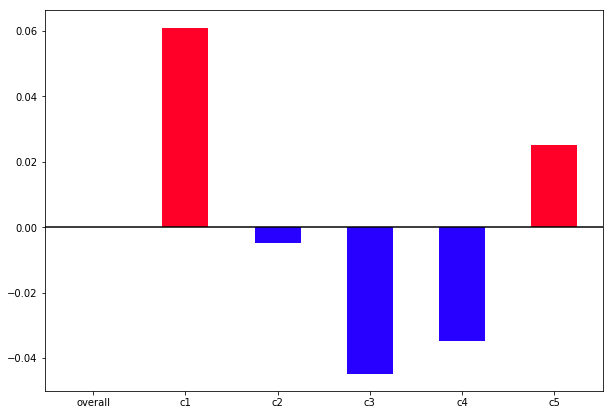

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

r = '#FF0028'
b = '#2800FF'

plt.figure(figsize=(10,7))
plt.bar(np.arange(6), tonb_enrichment, width=0.5, color=[r,r,b,b,b,r])
plt.xticks(np.arange(6), clusters)
plt.axhline(y=0, color='black', linestyle='-')
plt.savefig("figures/TonBenrichmentBarchart.png")
plt.show()



# most enriched PFams per cluster

In [235]:
for cluster in range(0,5):
    print("cluster",cluster+1)
    most_enriched = list(pfam_enriched.sort_values(cluster, axis=1, ascending=False).columns[0:20])
    #print(pfam_enriched.sort_values(cluster, axis=1, ascending=False))
    #print(pfam_enriched.sort_values(cluster, axis=1, ascending=False).loc[cluster,][0:50])
    #print(most_enriched)
    pfam_desc = {}
    KO_pathway = {}
    for pfam in most_enriched:
        matching = [s for s in annotations['PFams'].dropna() if pfam in s]
        matches = annotations[annotations['PFams'].isin(matching)][['PFams','PFams_desc','KO_pathway']]
        pfam_index = list(matches['PFams'])[0].split('||').index(pfam)
        desc = list(matches['PFams_desc'])[0].split('||')[pfam_index]
        #print(set(matches['PFams_desc']))
        #matches = set(annotations[annotations['PFams']==pfam]['PFams_desc'])
        pfam_desc[pfam] = desc
        KO_pathway[pfam] = list(matches['KO_pathway'])[0]
    print(pfam_desc)
    print('--')
    print(KO_pathway)
    

cluster 1
{'PF08298': 'PrkA AAA domain', 'PF04314': 'Protein of unknown function (DUF461)', 'PF07885': 'Ion channel', 'PF04607': 'Region found in RelA / SpoT proteins', 'PF02355': 'Protein export membrane protein', 'PF13759': 'PF13759', 'PF04321': 'RmlD substrate binding domain', 'PF03471': 'Transporter associated domain', 'PF06094': 'AIG2-like family', 'PF00515': 'Tetratricopeptide repeat', 'PF00195': 'Chalcone and stilbene synthases, N-terminal domain', 'PF12501': 'Phosphate ATP-binding cassette transporter', 'PF01043': 'SecA preprotein cross-linking domain', 'PF01872': 'RibD C-terminal domain', 'PF02637': 'GatB domain', 'PF13507': 'PF13507', 'PF12626': 'PF12626', 'PF05708': 'Orthopoxvirus protein of unknown function (DUF830)', 'PF02910': 'domain', 'PF02575': 'Uncharacterised BCR, YbaB family COG0718'}
--
{'PF08298': nan, 'PF04314': nan, 'PF07885': nan, 'PF04607': nan, 'PF02355': 'Protein export || Bacterial secretion system', 'PF13759': nan, 'PF04321': 'Streptomycin biosynthesis || 

### hmmmm it's hard to pick stuff out of here...

# look at some stuff from dupont et al 2012

In [276]:
matches = [x for x in labeled_annotations['PFams_desc'].dropna() if 'lycosyl hydrolase family 3' in x]
print(len(matches))
Counter(matches)

45


Counter({'Glycosyl hydrolase family 3 C terminal domain': 3,
         'Glycosyl hydrolase family 3 N terminal domain': 7,
         'Glycosyl hydrolase family 3 N terminal domain||_GAP_': 2,
         'Glycosyl hydrolase family 3 N terminal domain||_GAP_||Glycosyl hydrolase family 3 C terminal domain': 2,
         'Glycosyl hydrolase family 3 N terminal domain||_GAP_||Glycosyl hydrolase family 3 C terminal domain||_GAP_||PF14310': 3,
         '_GAP_||Glycosyl hydrolase family 3 C terminal domain||_GAP_': 1,
         '_GAP_||Glycosyl hydrolase family 3 N terminal domain': 4,
         '_GAP_||Glycosyl hydrolase family 3 N terminal domain||_GAP_': 1,
         '_GAP_||Glycosyl hydrolase family 3 N terminal domain||_GAP_||Glycosyl hydrolase family 3 C terminal domain': 15,
         '_GAP_||Glycosyl hydrolase family 3 N terminal domain||_GAP_||Glycosyl hydrolase family 3 C terminal domain||_GAP_': 7})

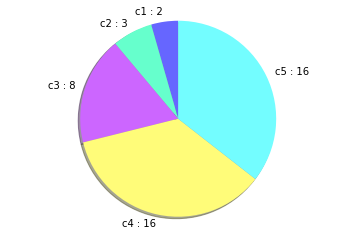

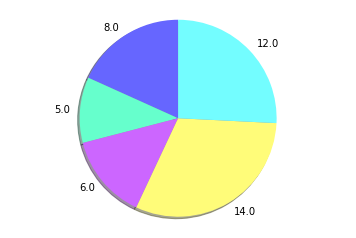

In [245]:
rows = labeled_annotations[labeled_annotations['PFams_desc'].isin(matches)]['cluster']
sums = Counter(rows)
plabels = ["c"+str(x[0])+" : "+str(x[1]) for x in sums.items()]
pcounts = [count for label,count in sums.items()]
percent = [count/len(rows) for label,count in sums.items()]

expected = [x[1]/len(labeled_annotations) for x in Counter(labeled_annotations['cluster']).items()]
expected_int = [round(x*len(rows),0) for x in expected]

fig1, ax1 = plt.subplots()
ax1.pie(pcounts, labels=plabels, shadow=True, startangle=90, colors=["#6666FF","#66FFCC","#CC66FF","#FFFC79","#73FDFF"])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
fig2, ax2 = plt.subplots()
ax2.pie(expected, labels=expected_int, shadow=True, startangle=90, colors=["#6666FF","#66FFCC","#CC66FF","#FFFC79","#73FDFF"])
ax2.axis('equal')
plt.show()

In [279]:
gh3_annotations = labeled_annotations[labeled_annotations['PFams_desc'].isin(matches)]
overall = len(gh3_annotations)/len(labeled_annotations)
clusters = ['overall']
gh3_enrichment = [(overall-overall)/overall]
gh3_percent = [overall-overall]
for clust in set(gh3_annotations['cluster']):
    num_gene_in_cluster = len(gh3_annotations[gh3_annotations['cluster']==clust])
    total_genes_in_cluster = len(labeled_annotations[labeled_annotations['cluster']==clust])
    
    clusters.append("c"+str(clust))
    gh3_enrichment.append(((num_gene_in_cluster/total_genes_in_cluster)-overall)/overall)
    gh3_percent.append(((num_gene_in_cluster/total_genes_in_cluster)-overall)*100)

In [281]:
gh3_enrichment

[0.0,
 -0.7565727170236753,
 -0.38190839694656487,
 0.27198821796759937,
 0.14002111932418154,
 0.37857940941739815]

number of genes annotated to GH3: 45


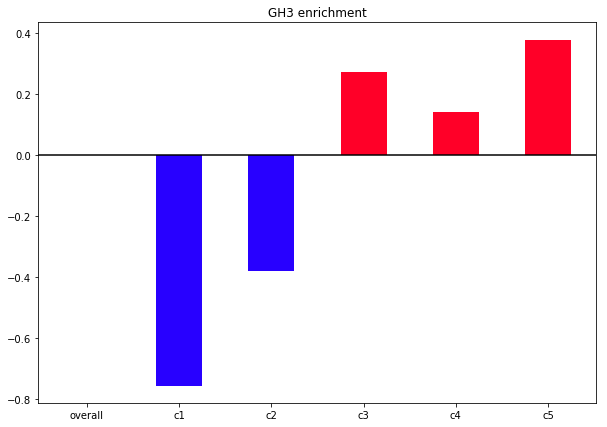

In [295]:
import matplotlib.pyplot as plt
%matplotlib inline

print("number of genes annotated to GH3:", len(gh3_annotations))
r = '#FF0028'
b = '#2800FF'

plt.figure(figsize=(10,7))
plt.bar(np.arange(6), gh3_enrichment, width=0.5, color=[r,b,b,r,r,r])
plt.xticks(np.arange(6), clusters)
plt.axhline(y=0, color='black', linestyle='-')
plt.title("GH3 enrichment")
plt.savefig("figures/GH3enrichmentBarchart.png")
plt.show()


In [284]:
matches = [x for x in labeled_annotations['PFams_desc'].dropna() if 'lycosyl hydrolases family 16' in x]
print(len(matches))
Counter(matches)

12


Counter({'Beta-glucan synthesis-associated protein (SKN1)||Glycosyl hydrolases family 16': 1,
         'Glycosyl hydrolases family 16': 2,
         '_GAP_||Glycosyl hydrolases family 16': 9})

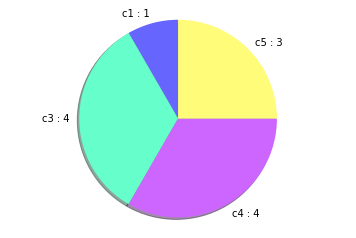

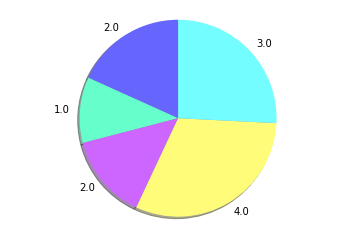

In [285]:
rows = labeled_annotations[labeled_annotations['PFams_desc'].isin(matches)]['cluster']
sums = Counter(rows)
plabels = ["c"+str(x[0])+" : "+str(x[1]) for x in sums.items()]
pcounts = [count for label,count in sums.items()]
percent = [count/len(rows) for label,count in sums.items()]

expected = [x[1]/len(labeled_annotations) for x in Counter(labeled_annotations['cluster']).items()]
expected_int = [round(x*len(rows),0) for x in expected]

fig1, ax1 = plt.subplots()
ax1.pie(pcounts, labels=plabels, shadow=True, startangle=90, colors=["#6666FF","#66FFCC","#CC66FF","#FFFC79","#73FDFF"])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
fig2, ax2 = plt.subplots()
ax2.pie(expected, labels=expected_int, shadow=True, startangle=90, colors=["#6666FF","#66FFCC","#CC66FF","#FFFC79","#73FDFF"])
ax2.axis('equal')
plt.show()

In [290]:
gh16_annotations = labeled_annotations[labeled_annotations['PFams_desc'].isin(matches)]
overall = len(gh16_annotations)/len(labeled_annotations)
clusters = ['overall']
gh16_enrichment = [(overall-overall)/overall]
gh16_percent = [overall-overall]
for clust in range(1,6):
    num_gene_in_cluster = len(gh16_annotations[gh16_annotations['cluster']==clust])
    total_genes_in_cluster = len(labeled_annotations[labeled_annotations['cluster']==clust])
    
    clusters.append("c"+str(clust))
    gh16_enrichment.append(((num_gene_in_cluster/total_genes_in_cluster)-overall)/overall)
    gh16_percent.append(((num_gene_in_cluster/total_genes_in_cluster)-overall)*100)

In [291]:
set(gh16_annotations['cluster'])

{1, 3, 4, 5}

In [292]:
gh16_enrichment

[0.0,
 -0.5435738444193913,
 -1.0,
 1.3849779086892489,
 0.0687697993664202,
 -0.03068635275339182]

total genes annotated to GH16: 12


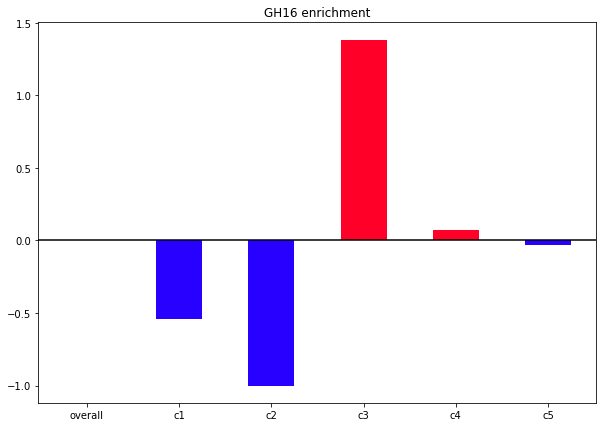

In [294]:
import matplotlib.pyplot as plt
%matplotlib inline

print("total genes annotated to GH16:", len(gh16_annotations))

r = '#FF0028'
b = '#2800FF'

plt.figure(figsize=(10,7))
plt.bar(np.arange(6), gh16_enrichment, width=0.5, color=[r,b,b,r,r,b])
plt.xticks(np.arange(6), clusters)
plt.axhline(y=0, color='black', linestyle='-')
plt.title("GH16 enrichment")
plt.savefig("figures/GH16enrichmentBarchart.png")
plt.show()


In [199]:
Counter(labeled_annotations['cluster'])

Counter({1: 4435, 2: 2620, 3: 3395, 4: 7576, 5: 6265})

In [250]:
matches = [x for x in labeled_annotations['PFams_desc'].dropna() if 'lutathione' in x]
print(len(matches))
Counter(matches)

206


Counter({'Glutathione S-transferase, C-terminal domain': 1,
         'Glutathione S-transferase, C-terminal domain||_GAP_': 2,
         'Glutathione S-transferase, N-terminal domain': 4,
         'Glutathione S-transferase, N-terminal domain||Glutathione S-transferase, C-terminal domain': 35,
         'Glutathione S-transferase, N-terminal domain||Glutathione S-transferase, C-terminal domain||_GAP_': 11,
         'Glutathione S-transferase, N-terminal domain||PF13410': 2,
         'Glutathione S-transferase, N-terminal domain||PF14497||_GAP_': 1,
         'Glutathione S-transferase, N-terminal domain||_GAP_': 15,
         'Glutathione S-transferase, N-terminal domain||_GAP_||Glutathione S-transferase, C-terminal domain': 17,
         'Glutathione S-transferase, N-terminal domain||_GAP_||Glutathione S-transferase, C-terminal domain||_GAP_': 6,
         'Glutathione S-transferase, N-terminal domain||_GAP_||PF13410||_GAP_': 9,
         'Glutathione peroxidase': 1,
         'Glutathione pe

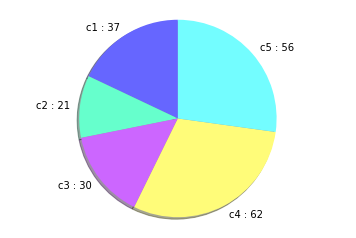

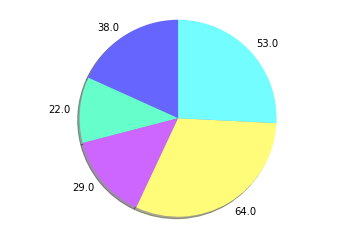

In [251]:
rows = labeled_annotations[labeled_annotations['PFams_desc'].isin(matches)]['cluster']
sums = Counter(rows)
plabels = ["c"+str(x[0])+" : "+str(x[1]) for x in sums.items()]
pcounts = [count for label,count in sums.items()]
percent = [count/len(rows) for label,count in sums.items()]

expected = [x[1]/len(labeled_annotations) for x in Counter(labeled_annotations['cluster']).items()]
expected_int = [round(x*len(rows),0) for x in expected]

fig1, ax1 = plt.subplots()
ax1.pie(pcounts, labels=plabels, shadow=True, startangle=90, colors=["#6666FF","#66FFCC","#CC66FF","#FFFC79","#73FDFF"])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
fig2, ax2 = plt.subplots()
ax2.pie(expected, labels=expected_int, shadow=True, startangle=90, colors=["#6666FF","#66FFCC","#CC66FF","#FFFC79","#73FDFF"])
ax2.axis('equal')
plt.show()

In [260]:
matches = [x for x in labeled_annotations['PFams_desc'].dropna() if 'ethionine synt' in x]
print(len(matches))
Counter(matches)

20


Counter({'S-adenosylmethionine synthetase, N-terminal domain': 1,
         'S-adenosylmethionine synthetase, N-terminal domain||S-adenosylmethionine synthetase, central domain': 1,
         'S-adenosylmethionine synthetase, N-terminal domain||S-adenosylmethionine synthetase, central domain||S-adenosylmethionine synthetase, C-terminal domain': 16,
         '_GAP_||S-adenosylmethionine synthetase, C-terminal domain': 1,
         '_GAP_||S-adenosylmethionine synthetase, central domain||S-adenosylmethionine synthetase, C-terminal domain': 1})

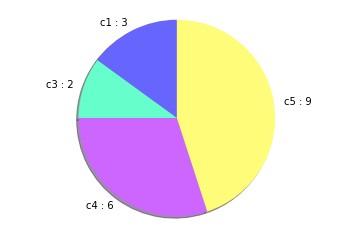

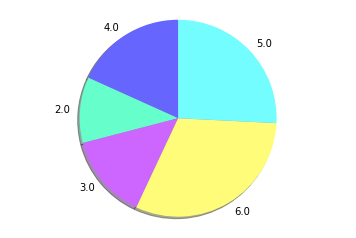

In [261]:
rows = labeled_annotations[labeled_annotations['PFams_desc'].isin(matches)]['cluster']
sums = Counter(rows)
plabels = ["c"+str(x[0])+" : "+str(x[1]) for x in sums.items()]
pcounts = [count for label,count in sums.items()]
percent = [count/len(rows) for label,count in sums.items()]

expected = [x[1]/len(labeled_annotations) for x in Counter(labeled_annotations['cluster']).items()]
expected_int = [round(x*len(rows),0) for x in expected]

fig1, ax1 = plt.subplots()
ax1.pie(pcounts, labels=plabels, shadow=True, startangle=90, colors=["#6666FF","#66FFCC","#CC66FF","#FFFC79","#73FDFF"])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
fig2, ax2 = plt.subplots()
ax2.pie(expected, labels=expected_int, shadow=True, startangle=90, colors=["#6666FF","#66FFCC","#CC66FF","#FFFC79","#73FDFF"])
ax2.axis('equal')
plt.show()

In [264]:
matches = [x for x in labeled_annotations['PFams_desc'].dropna() if 'ipase' in x]
print(len(matches))
Counter(matches)

27


Counter({'Patatin-like phospholipase||_GAP_': 14,
         'Phospholipase/Carboxylesterase||_GAP_': 2,
         'Putative lysophospholipase||PF12695': 2,
         'Putative lysophospholipase||PF12697': 7,
         '_GAP_||Lipase (class 3)||_GAP_': 1,
         '_GAP_||Phospholipase/Carboxylesterase||_GAP_': 1})

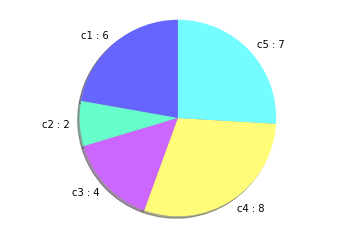

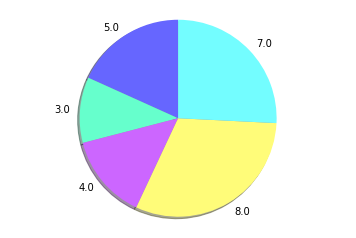

In [265]:
rows = labeled_annotations[labeled_annotations['PFams_desc'].isin(matches)]['cluster']
sums = Counter(rows)
plabels = ["c"+str(x[0])+" : "+str(x[1]) for x in sums.items()]
pcounts = [count for label,count in sums.items()]
percent = [count/len(rows) for label,count in sums.items()]

expected = [x[1]/len(labeled_annotations) for x in Counter(labeled_annotations['cluster']).items()]
expected_int = [round(x*len(rows),0) for x in expected]

fig1, ax1 = plt.subplots()
ax1.pie(pcounts, labels=plabels, shadow=True, startangle=90, colors=["#6666FF","#66FFCC","#CC66FF","#FFFC79","#73FDFF"])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
fig2, ax2 = plt.subplots()
ax2.pie(expected, labels=expected_int, shadow=True, startangle=90, colors=["#6666FF","#66FFCC","#CC66FF","#FFFC79","#73FDFF"])
ax2.axis('equal')
plt.show()

In [267]:
matches = [x for x in labeled_annotations['PFams_desc'].dropna() if 'cyl-CoA' in x]
print(len(matches))
Counter(matches)

218


Counter({'Acyl-CoA dehydrogenase, C-terminal domain': 4,
         'Acyl-CoA dehydrogenase, N-terminal domain': 2,
         'Acyl-CoA dehydrogenase, N-terminal domain||Acyl-CoA dehydrogenase, middle domain': 1,
         'Acyl-CoA dehydrogenase, N-terminal domain||Acyl-CoA dehydrogenase, middle domain||_GAP_': 5,
         'Acyl-CoA dehydrogenase, N-terminal domain||Acyl-CoA dehydrogenase, middle domain||_GAP_||Acyl-CoA dehydrogenase, C-terminal domain': 108,
         'Acyl-CoA dehydrogenase, N-terminal domain||_GAP_': 1,
         'Acyl-CoA dehydrogenase, N-terminal domain||_GAP_||Acyl-CoA dehydrogenase, C-terminal domain': 46,
         'Acyl-CoA dehydrogenase, N-terminal domain||_GAP_||Acyl-CoA dehydrogenase, C-terminal domain||_GAP_': 1,
         'Acyl-CoA dehydrogenase, N-terminal domain||_GAP_||Acyl-CoA dehydrogenase, C-terminal domain||_GAP_||TonB dependent receptor||_GAP_': 1,
         'Acyl-CoA dehydrogenase, middle domain||_GAP_||Acyl-CoA dehydrogenase, C-terminal domain': 1,
    

In [269]:
matches = [x for x in labeled_annotations['PFams_desc'].dropna() if 'ABC transporter' in x]
print(len(matches))
Counter(matches)

174


Counter({'ABC transporter': 2,
         'ABC transporter transmembrane region||_GAP_||ABC transporter': 1,
         'ABC transporter transmembrane region||_GAP_||ABC transporter||_GAP_': 4,
         "ABC transporter transmembrane region||_GAP_||ABC transporter||_GAP_||Tetraacyldisaccharide-1-P 4'-kinase": 19,
         'ABC transporter||_GAP_': 107,
         'ABC transporter||_GAP_||Oligopeptide/dipeptide transporter, C-terminal region||ABC transporter': 1,
         'ABC transporter||_GAP_||Oligopeptide/dipeptide transporter, C-terminal region||ABC transporter||_GAP_||Oligopeptide/dipeptide transporter, C-terminal region': 15,
         'ABC transporter||_GAP_||PF12848||ABC transporter||_GAP_': 1,
         "ABC transporter||_GAP_||Tetraacyldisaccharide-1-P 4'-kinase||_GAP_": 1,
         '_GAP_||ABC transporter': 1,
         '_GAP_||ABC transporter||Hsp33 protein': 1,
         '_GAP_||ABC transporter||_GAP_': 21})

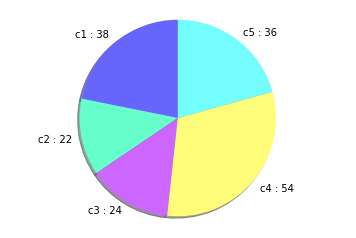

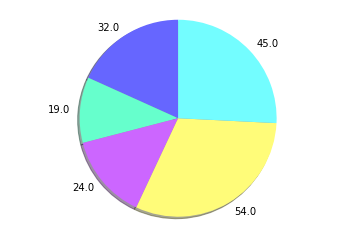

In [270]:
rows = labeled_annotations[labeled_annotations['PFams_desc'].isin(matches)]['cluster']
sums = Counter(rows)
plabels = ["c"+str(x[0])+" : "+str(x[1]) for x in sums.items()]
pcounts = [count for label,count in sums.items()]
percent = [count/len(rows) for label,count in sums.items()]

expected = [x[1]/len(labeled_annotations) for x in Counter(labeled_annotations['cluster']).items()]
expected_int = [round(x*len(rows),0) for x in expected]

fig1, ax1 = plt.subplots()
ax1.pie(pcounts, labels=plabels, shadow=True, startangle=90, colors=["#6666FF","#66FFCC","#CC66FF","#FFFC79","#73FDFF"])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
fig2, ax2 = plt.subplots()
ax2.pie(expected, labels=expected_int, shadow=True, startangle=90, colors=["#6666FF","#66FFCC","#CC66FF","#FFFC79","#73FDFF"])
ax2.axis('equal')
plt.show()

In [272]:
matches = [x for x in labeled_annotations['PFams_desc'].dropna() if 'TonB' in x]
print(len(matches))
Counter(matches)

330


Counter({'Acyl-CoA dehydrogenase, N-terminal domain||_GAP_||Acyl-CoA dehydrogenase, C-terminal domain||_GAP_||TonB dependent receptor||_GAP_': 1,
         'PF13620||TonB-dependent Receptor Plug Domain||_GAP_': 7,
         'PF14905||TonB dependent receptor': 1,
         'TonB dependent receptor': 22,
         'TonB-dependent Receptor Plug Domain||_GAP_': 8,
         'TonB-dependent Receptor Plug Domain||_GAP_||TonB dependent receptor': 10,
         'TonB-dependent Receptor Plug Domain||_GAP_||TonB dependent receptor||_GAP_': 2,
         '_GAP_||PF13620||TonB-dependent Receptor Plug Domain||_GAP_': 1,
         '_GAP_||TonB C terminal': 28,
         '_GAP_||TonB dependent receptor': 32,
         '_GAP_||TonB dependent receptor||_GAP_': 4,
         '_GAP_||TonB-dependent Receptor Plug Domain': 4,
         '_GAP_||TonB-dependent Receptor Plug Domain||Nicotinamide mononucleotide transporter': 1,
         '_GAP_||TonB-dependent Receptor Plug Domain||_GAP_': 89,
         '_GAP_||TonB-dependent

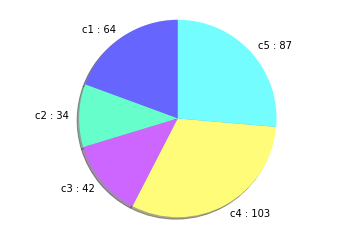

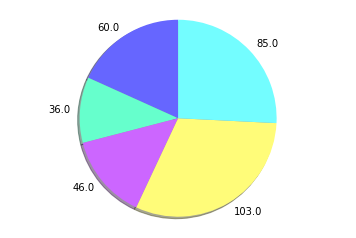

In [273]:
rows = labeled_annotations[labeled_annotations['PFams_desc'].isin(matches)]['cluster']
sums = Counter(rows)
plabels = ["c"+str(x[0])+" : "+str(x[1]) for x in sums.items()]
pcounts = [count for label,count in sums.items()]
percent = [count/len(rows) for label,count in sums.items()]

expected = [x[1]/len(labeled_annotations) for x in Counter(labeled_annotations['cluster']).items()]
expected_int = [round(x*len(rows),0) for x in expected]

fig1, ax1 = plt.subplots()
ax1.pie(pcounts, labels=plabels, shadow=True, startangle=90, colors=["#6666FF","#66FFCC","#CC66FF","#FFFC79","#73FDFF"])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
fig2, ax2 = plt.subplots()
ax2.pie(expected, labels=expected_int, shadow=True, startangle=90, colors=["#6666FF","#66FFCC","#CC66FF","#FFFC79","#73FDFF"])
ax2.axis('equal')
plt.show()